## Dresslar CAS522 M2 Notebook


In [82]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

> Question 1: Define a python function that generates the adjacency matrix of a random (Erdos-Renyi) graph with N nodes and probability p.

In [ ]:
def ER_adj_matrix(N,p):
    """
    Create an adjacency matrix for a random E-R graph with N nodes and probability p.
    For example, if N=3 and p=0.5, we might have:

    [[0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]]

    Note that a tricky aspect is that the matrix is to be symmetric (undirected) and so we need to set one triangle and
    reflect it into the other.
    """
    A = np.zeros((N,N), dtype=int)
    for i in range(N):
        for j in range(i+1, N): # just do the "top" triangle. i+1 includes an offset.
            if np.random.rand() < p:
                A[i,j] = 1
                A[j,i] = 1 # reflection!
                    
    return A

In [84]:
n = 10
p = 0.2

A = ER_adj_matrix(n,p)

print(A)

[[0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


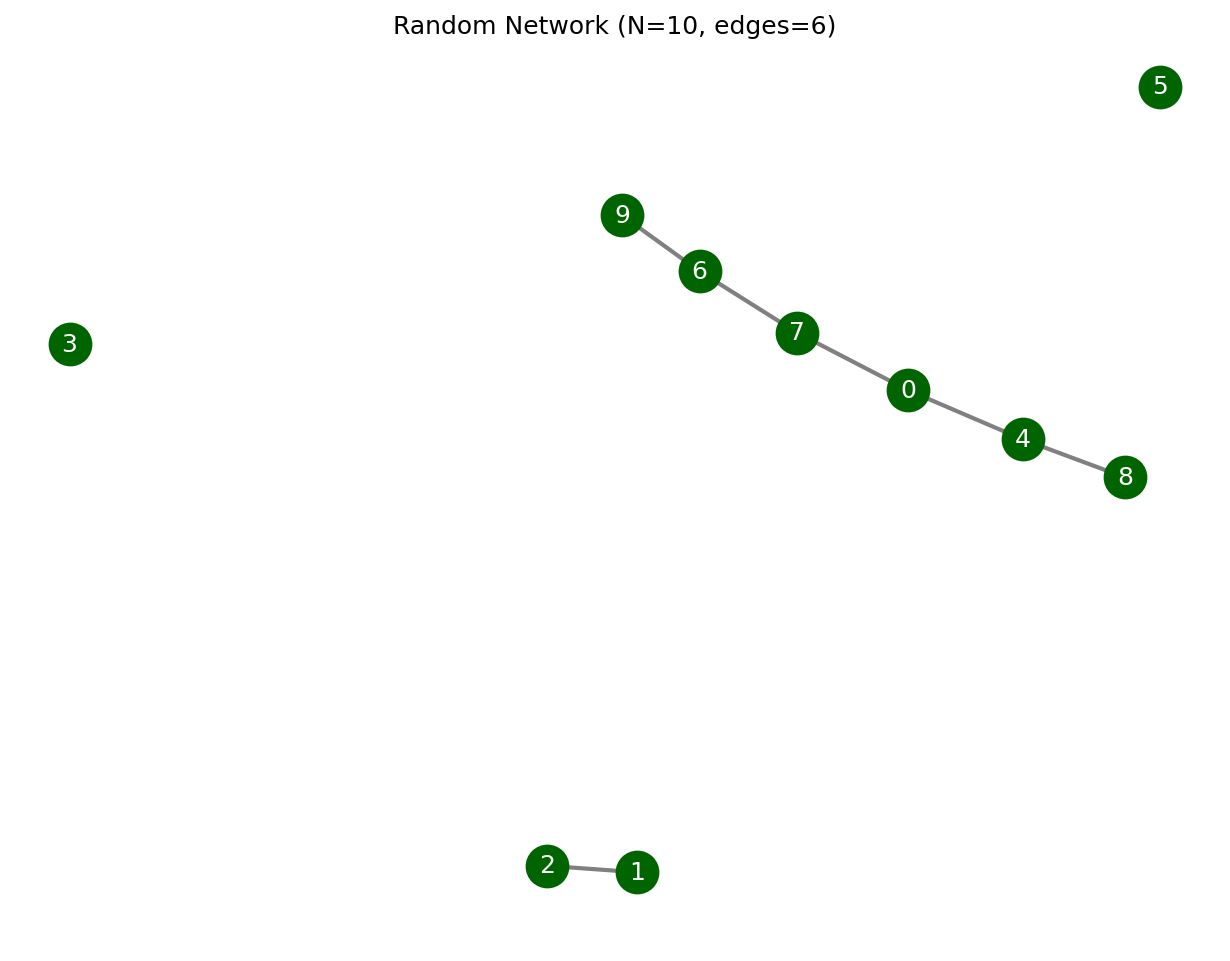

In [85]:
def plot_network_from_matrix(A):
    # see: https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_array.html
    G = nx.from_numpy_array(np.array(A))
    
    # layout. see: https://networkx.org/documentation/stable/auto_examples/drawing/plot_spring_layout.html
    pos = nx.spring_layout(G, seed=112358)
    
    # Plot
    plt.figure(figsize=(8, 6), dpi=150)
    nx.draw(G, pos, 
            node_size=400, 
            node_color='darkgreen', 
            edge_color='gray',
            with_labels=True, 
            font_color='white',
            font_size=12,
            width=2)
    plt.title(f"Random Network (N={len(A)}, edges={G.number_of_edges()})")
    plt.axis('off')
    plt.show()

# Use it:
plot_network_from_matrix(A)